In [1]:
!date

Tue May 13 06:20:34 PM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ants

In [4]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [5]:
def correlate_columns(arr1, arr2):
    """
    Computes the Pearson correlation between corresponding columns of two matrices.
    
    Parameters:
    arr1 (np.ndarray): First matrix of shape (370, 1000)
    arr2 (np.ndarray): Second matrix of shape (370, 1000)
    
    Returns:
    np.ndarray: 1D array of correlations for each column (size 1000)
    """
    # Ensure input arrays are numpy arrays
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    
    # Subtract the mean of each column (normalize)
    arr1_centered = arr1 - np.mean(arr1, axis=0)
    arr2_centered = arr2 - np.mean(arr2, axis=0)
    
    # Compute the numerator (covariance)
    numerator = np.sum(arr1_centered * arr2_centered, axis=0)
    
    # Compute the denominator (product of standard deviations)
    denominator = np.sqrt(np.sum(arr1_centered**2, axis=0) * np.sum(arr2_centered**2, axis=0))
    
    # Compute the Pearson correlation for each column
    correlation = numerator / denominator
    
    return correlation

In [6]:
ls ../Data/BrainIAK/

brainIAK_cf.nii.gz                   brainIAK_observation.nii.gz
brainIAK_compcor-v2.nii              brainIAK_observation-v2.nii.gz
brainIAK_gm.nii.gz                   brainIAK_signal.nii.gz
brainIAK_noise.nii.gz                brainIAK_signal-v2.nii.gz
brainIAK_noise-v2.nii.gz             YZ-Realistic_data_simulation.ipynb
brainIAK_observation_compcor.nii.gz


In [7]:
indir = '../Data/StudyForrest/ensembles_last_CVAE/'
analysis_name = 'BrainIAK-CVAE-1'

In [8]:
sig_files = [f for f in os.listdir(os.path.join(indir,analysis_name)) if f.startswith('signal_')]
sig_files.sort()
sig_ims = [ants.image_read(os.path.join(indir,analysis_name,sig_file)) for sig_file in sig_files]

In [9]:
arr_deepcor = np.median(np.array([sig_im.numpy() for sig_im in sig_ims]),axis=0)

In [10]:
obs_deepcor = sig_ims[0].new_image_like(arr_deepcor)

In [11]:
gm = ants.image_read('../Data/BrainIAK/brainIAK_gm.nii.gz')
cf = ants.image_read('../Data/BrainIAK/brainIAK_cf.nii.gz')

In [12]:
noise = ants.image_read('../Data/BrainIAK/brainIAK_noise-v2.nii.gz')
signal = ants.image_read('../Data/BrainIAK/brainIAK_signal-v2.nii.gz')
observation = ants.image_read('../Data/BrainIAK/brainIAK_observation-v2.nii.gz')
obs_compcor = ants.image_read('../Data/BrainIAK/brainIAK_compcor-v2.nii')

In [13]:
noi_list = observation.numpy()[cf.numpy()==1]
obs_list = observation.numpy()[gm.numpy()==1]

In [14]:
deepcor_list = obs_deepcor.numpy()[gm.numpy()==1]
compcor_list = obs_compcor.numpy()[gm.numpy()==1]
GT_list = signal.numpy()[gm.numpy()==1]

In [15]:
r_raw = correlate_columns(obs_list.transpose(), GT_list.transpose())
r_compcor = correlate_columns(compcor_list.transpose(), GT_list.transpose())
r_deepcor = correlate_columns(deepcor_list.transpose(), GT_list.transpose())

<ipython-input-5-9f9a06f806b9>:27: RuntimeWarning: invalid value encountered in true_divide
  correlation = numerator / denominator


In [16]:
[np.nanmean(r_raw),
np.nanmean(r_compcor),
np.nanmean(r_deepcor),]

[0.28818873, 0.33572462, 0.2596558]

In [20]:
#gm.numpy()[32,32,32]

In [23]:
x,y,z = 32,32,32
gm.numpy()[x,y,z]

1.0

0.31021253624486356


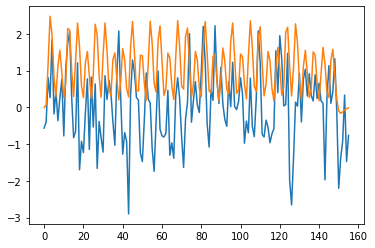

In [30]:
v1 = observation.numpy()[x,y,z]
v2 = signal.numpy()[x,y,z]
plt.plot(v1)
plt.plot(v2)
print(np.corrcoef(v1,v2)[0,1])

0.3724735472463445


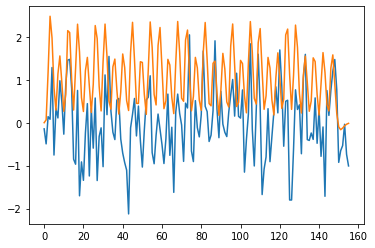

In [32]:
v1 = obs_compcor.numpy()[x,y,z]
v2 = signal.numpy()[x,y,z]
plt.plot(v1)
plt.plot(v2)
print(np.corrcoef(v1,v2)[0,1])

0.15232623496965958


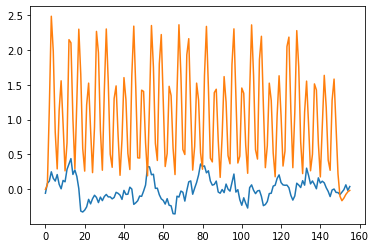

In [33]:
v1 = obs_deepcor.numpy()[x,y,z]
v2 = signal.numpy()[x,y,z]
plt.plot(v1)
plt.plot(v2)
print(np.corrcoef(v1,v2)[0,1])

In [45]:
vec_arr = np.array([sig_im.numpy()[x,y,z] for sig_im in sig_ims])
#plt.plot()

In [48]:
[np.corrcoef(i,signal.numpy()[x,y,z])[0,1] for i in vec_arr]

[-0.05727191192288296,
 0.17788176721195198,
 -0.07417564559573145,
 0.1925322444226748,
 0.17321883708360805,
 0.06616257236783543,
 0.42531953665616484,
 0.06145227881428728]